***Attempting various methods for the multivariate time series classification***

Implementation of Random Forest Classification on the multivariate Time series Data (UCR)

In [2]:
import os
import glob
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

def process_and_train_random_forest_classifier(file_path):
    # Load the dataset
    data = pd.read_csv(file_path, sep='\t', header=None)
    
    # Remove columns with all NaN values
    data.dropna(axis=1, how='all', inplace=True)
    
    # Handling NaN values by imputing with the mean of the column
    imputer = SimpleImputer(strategy='mean')
    data_imputed = imputer.fit_transform(data)
    data = pd.DataFrame(data_imputed, columns=range(data_imputed.shape[1]))
    
    # Splitting the dataset into features (X) and target (Y)
    X = data.drop(columns=[0])  # Features
    Y = data[0]  # Target
    
    # Splitting data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    # Initializing and training the RandomForest Classifier
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, Y_train)
    
    # Predicting on the test set
    y_pred = model.predict(X_test)
    
    # Calculating the accuracy score
    accuracy = accuracy_score(Y_test, y_pred)
    
    # Calculating the error rate
    error_rate = 1 - accuracy
    
    return file_path, error_rate

results = []

master_folder_path = '/Users/shashwatkushwaha/Downloads/UCRArchive_2018'

for folder_name in os.listdir(master_folder_path):
    folder_path = os.path.join(master_folder_path, folder_name)
    if os.path.isdir(folder_path):
        for file_path in glob.glob(os.path.join(folder_path, '*.tsv')):
            try:
                result = process_and_train_random_forest_classifier(file_path)
                results.append(result)
            except Exception as e:
                print(f"Error processing {file_path}: {e}")

results_df = pd.DataFrame(results, columns=['File', 'Error Rate'])

print(results_df.to_string())


                                                                                                                          File  Error Rate
0                                                  /Users/shashwatkushwaha/Downloads/UCRArchive_2018/Haptics/Haptics_TRAIN.tsv    0.419355
1                                                   /Users/shashwatkushwaha/Downloads/UCRArchive_2018/Haptics/Haptics_TEST.tsv    0.596774
2                                /Users/shashwatkushwaha/Downloads/UCRArchive_2018/SyntheticControl/SyntheticControl_TRAIN.tsv    0.016667
3                                 /Users/shashwatkushwaha/Downloads/UCRArchive_2018/SyntheticControl/SyntheticControl_TEST.tsv    0.066667
4                                                       /Users/shashwatkushwaha/Downloads/UCRArchive_2018/Worms/Worms_TEST.tsv    0.687500
5                                                      /Users/shashwatkushwaha/Downloads/UCRArchive_2018/Worms/Worms_TRAIN.tsv    0.378378
6                          

Implementation of KNN Classification on the multivariate Time series Data (UCR)

In [3]:
import os
import glob
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer

def process_and_train_1nn(file_path):
    # Load the dataset
    data = pd.read_csv(file_path, sep='\t', header=None)
    
    # Remove columns with all NaN values
    data.dropna(axis=1, how='all', inplace=True)
    
    # Handling NaN values by imputing with the mean of the column
    imputer = SimpleImputer(strategy='mean')
    data_imputed = imputer.fit_transform(data)
    data = pd.DataFrame(data_imputed, columns=range(data_imputed.shape[1]))
    
    # Splitting the dataset into features (X) and target (Y)
    X = data.drop(columns=[0])  # Features
    Y = data[0]  # Target
    
    # Splitting data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    # Initializing and training the 1-NN regressor with Euclidean distance
    model = KNeighborsRegressor(n_neighbors=1, metric='euclidean')
    model.fit(X_train, Y_train)
    
    # Evaluating the model's performance
    training_score = model.score(X_train, Y_train)
    testing_score = model.score(X_test, Y_test)
    
    return file_path, training_score, testing_score

results = []



master_folder_path = '/Users/shashwatkushwaha/Downloads/UCRArchive_2018'

for folder_name in os.listdir(master_folder_path):
    folder_path = os.path.join(master_folder_path, folder_name)
    if os.path.isdir(folder_path):
        for file_path in glob.glob(os.path.join(folder_path, '*.tsv')):
            try:
                result = process_and_train_1nn(file_path)
                results.append(result)
            except Exception as e:
                print(f"Error processing {file_path}: {e}")

#calculating the R2 score for the training and testing data
results_df_1nn = pd.DataFrame(results, columns=['File', 'Training R^2 Score', 'Testing R^2 Score'])

print(results_df_1nn.to_string())


                                                                                                                          File  Training R^2 Score  Testing R^2 Score
0                                                  /Users/shashwatkushwaha/Downloads/UCRArchive_2018/Haptics/Haptics_TRAIN.tsv            1.000000          -1.041916
1                                                   /Users/shashwatkushwaha/Downloads/UCRArchive_2018/Haptics/Haptics_TEST.tsv            1.000000          -0.886026
2                                /Users/shashwatkushwaha/Downloads/UCRArchive_2018/SyntheticControl/SyntheticControl_TRAIN.tsv            1.000000           0.359939
3                                 /Users/shashwatkushwaha/Downloads/UCRArchive_2018/SyntheticControl/SyntheticControl_TEST.tsv            1.000000           0.845700
4                                                       /Users/shashwatkushwaha/Downloads/UCRArchive_2018/Worms/Worms_TEST.tsv            1.000000          -1.702703
5   

In [4]:
import os
import glob
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

def process_and_train_1nn(file_path):
    # Load the dataset
    data = pd.read_csv(file_path, sep='\t', header=None)
    
    # Remove columns with all NaN values
    data.dropna(axis=1, how='all', inplace=True)
    
    # Handling NaN values by imputing with the mean of the column
    imputer = SimpleImputer(strategy='mean')
    data_imputed = imputer.fit_transform(data)
    data = pd.DataFrame(data_imputed, columns=range(data_imputed.shape[1]))
    
    # Splitting the dataset into features (X) and target (Y)
    X = data.drop(columns=[0])  # Features
    Y = data[0]  # Target
    
    # Splitting data into training and testing sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    
    # Initializing and training the 1-NN regressor with Euclidean distance
    model = KNeighborsRegressor(n_neighbors=1, metric='euclidean')
    model.fit(X_train, Y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate Mean Squared Error (MSE) as error rate
    mse = mean_squared_error(Y_test, y_pred)
    
    return file_path, mse

results = []

master_folder_path = '/Users/shashwatkushwaha/Downloads/UCRArchive_2018'

for folder_name in os.listdir(master_folder_path):
    folder_path = os.path.join(master_folder_path, folder_name)
    if os.path.isdir(folder_path):
        for file_path in glob.glob(os.path.join(folder_path, '*.tsv')):
            try:
                result = process_and_train_1nn(file_path)
                results.append(result)
            except Exception as e:
                print(f"Error processing {file_path}: {e}")

#calculating the MSE score for the training and testing data
results_df_1nn = pd.DataFrame(results, columns=['File', 'MSE'])

print(results_df_1nn.to_string())


                                                                                                                          File         MSE
0                                                  /Users/shashwatkushwaha/Downloads/UCRArchive_2018/Haptics/Haptics_TRAIN.tsv    3.548387
1                                                   /Users/shashwatkushwaha/Downloads/UCRArchive_2018/Haptics/Haptics_TEST.tsv    3.693548
2                                /Users/shashwatkushwaha/Downloads/UCRArchive_2018/SyntheticControl/SyntheticControl_TRAIN.tsv    1.866667
3                                 /Users/shashwatkushwaha/Downloads/UCRArchive_2018/SyntheticControl/SyntheticControl_TEST.tsv    0.450000
4                                                       /Users/shashwatkushwaha/Downloads/UCRArchive_2018/Worms/Worms_TEST.tsv    4.687500
5                                                      /Users/shashwatkushwaha/Downloads/UCRArchive_2018/Worms/Worms_TRAIN.tsv    2.756757
6                          

In [5]:
import os
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score

def process_and_evaluate_1nn(train_file_path, test_file_path):
    # Function to load and preprocess dataset
    def load_and_preprocess(file_path):
        data = pd.read_csv(file_path, sep='\t', header=None)
        data.dropna(axis=1, how='all', inplace=True)
        imputer = SimpleImputer(strategy='mean')
        data_imputed = imputer.fit_transform(data)
        return pd.DataFrame(data_imputed, columns=range(data_imputed.shape[1]))
    
    # Load and preprocess training and testing data
    train_data = load_and_preprocess(train_file_path)
    test_data = load_and_preprocess(test_file_path)
    
    X_train = train_data.drop(columns=[0])
    Y_train = train_data[0]
    X_test = test_data.drop(columns=[0])
    Y_test = test_data[0]
    
    # Initialize and train the 1-NN classifier with Euclidean distance
    model = KNeighborsClassifier(n_neighbors=1, metric='euclidean')
    model.fit(X_train, Y_train)
    
    # Predict and calculate error rate
    y_pred = model.predict(X_test.values)
    error_rate = 1 - accuracy_score(Y_test, y_pred)
    
    return train_file_path, test_file_path, error_rate

results = []

master_folder_path = '/Users/shashwatkushwaha/Downloads/UCRArchive_2018'

for folder_name in os.listdir(master_folder_path):
    folder_path = os.path.join(master_folder_path, folder_name)
    if os.path.isdir(folder_path):
        train_file_path = os.path.join(folder_path, folder_name + '_TRAIN.tsv')
        test_file_path = os.path.join(folder_path, folder_name + '_TEST.tsv')
        if os.path.isfile(train_file_path) and os.path.isfile(test_file_path):
            try:
                result = process_and_evaluate_1nn(train_file_path, test_file_path)
                results.append(result)
            except Exception as e:
                print(f"Error processing {train_file_path} and {test_file_path}: {e}")

results_df_1nn_error_rate_train = pd.DataFrame(results, columns=['Train File', 'Test File', 'Error Rate'])

print(results_df_1nn_error_rate_train.to_string())


Error processing /Users/shashwatkushwaha/Downloads/UCRArchive_2018/AllGestureWiimoteY/AllGestureWiimoteY_TRAIN.tsv and /Users/shashwatkushwaha/Downloads/UCRArchive_2018/AllGestureWiimoteY/AllGestureWiimoteY_TEST.tsv: X has 385 features, but KNeighborsClassifier is expecting 369 features as input.
Error processing /Users/shashwatkushwaha/Downloads/UCRArchive_2018/GesturePebbleZ2/GesturePebbleZ2_TRAIN.tsv and /Users/shashwatkushwaha/Downloads/UCRArchive_2018/GesturePebbleZ2/GesturePebbleZ2_TEST.tsv: X has 345 features, but KNeighborsClassifier is expecting 455 features as input.
Error processing /Users/shashwatkushwaha/Downloads/UCRArchive_2018/AllGestureWiimoteX/AllGestureWiimoteX_TRAIN.tsv and /Users/shashwatkushwaha/Downloads/UCRArchive_2018/AllGestureWiimoteX/AllGestureWiimoteX_TEST.tsv: X has 369 features, but KNeighborsClassifier is expecting 385 features as input.
Error processing /Users/shashwatkushwaha/Downloads/UCRArchive_2018/ShakeGestureWiimoteZ/ShakeGestureWiimoteZ_TRAIN.tsv

In [6]:
print(results_df_1nn_error_rate_train.drop('Train File',axis=1).to_string())

                                                                                                                    Test File  Error Rate
0                                                  /Users/shashwatkushwaha/Downloads/UCRArchive_2018/Haptics/Haptics_TEST.tsv    0.629870
1                                /Users/shashwatkushwaha/Downloads/UCRArchive_2018/SyntheticControl/SyntheticControl_TEST.tsv    0.120000
2                                                      /Users/shashwatkushwaha/Downloads/UCRArchive_2018/Worms/Worms_TEST.tsv    0.545455
3                                              /Users/shashwatkushwaha/Downloads/UCRArchive_2018/Computers/Computers_TEST.tsv    0.424000
4                                          /Users/shashwatkushwaha/Downloads/UCRArchive_2018/HouseTwenty/HouseTwenty_TEST.tsv    0.319328
5                                  /Users/shashwatkushwaha/Downloads/UCRArchive_2018/GestureMidAirD3/GestureMidAirD3_TEST.tsv    0.784615
6                                 

In [7]:
!pip3 install dtaidistance

In [8]:
!pip3 install --upgrade pip
!pip3 install fastdtw

Implementing Distance Time Warping on the multivariate data


In [9]:
import os
import glob
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from dtaidistance import dtw
import numpy as np

def process_and_train_1nn_dtw(train_file_path, test_file_path):
    # Load the datasets
    train_data = pd.read_csv(train_file_path, sep='\t', header=None)
    test_data = pd.read_csv(test_file_path, sep='\t', header=None)
    
    # Remove columns with all NaN values
    train_data.dropna(axis=1, how='all', inplace=True)
    test_data.dropna(axis=1, how='all', inplace=True)
    
    # Handling NaN values by imputing with the mean of the column
    imputer = SimpleImputer(strategy='mean')
    train_data_imputed = imputer.fit_transform(train_data)
    test_data_imputed = imputer.transform(test_data)  # Use the same imputer to ensure consistency
    
    train_data = pd.DataFrame(train_data_imputed, columns=range(train_data_imputed.shape[1]))
    test_data = pd.DataFrame(test_data_imputed, columns=range(test_data_imputed.shape[1]))
    
    # Splitting the datasets into features (X) and target (Y)
    X_train = train_data.drop(columns=[0]).values  # Features
    Y_train = train_data[0].values  # Target
    
    X_test = test_data.drop(columns=[0]).values  # Features
    Y_test = test_data[0].values  # Target
    
    # DTW distance matrix
    distances = dtw.distance_matrix_fast(X_train, X_test, use_pruning=True)
    
    # Predictions based on nearest neighbor
    predictions = np.argmin(distances, axis=0)
    predicted_labels = Y_train[predictions]
    
    # Calculate error rate
    error_rate = np.mean(predicted_labels != Y_test)
    
    return train_file_path, test_file_path, error_rate

results = []

master_folder_path = '/Users/shashwatkushwaha/Downloads/UCRArchive_2018'

for folder_name in os.listdir(master_folder_path):
    folder_path = os.path.join(master_folder_path, folder_name)
    if os.path.isdir(folder_path):
        train_file_path = glob.glob(os.path.join(folder_path, '*_TRAIN.tsv'))
        test_file_path = glob.glob(os.path.join(folder_path, '*_TEST.tsv'))
        if train_file_path and test_file_path:  # Ensure both train and test files exist
            try:
                result = process_and_train_1nn_dtw(train_file_path[0], test_file_path[0])
                results.append(result)
            except Exception as e:
                print(f"Error processing {folder_path}: {e}")

results_df_1nn_dtw_nwp = pd.DataFrame(results, columns=['Train File', 'Test File', 'Error Rate'])



Error processing /Users/shashwatkushwaha/Downloads/UCRArchive_2018/Haptics: only length-1 arrays can be converted to Python scalars
Error processing /Users/shashwatkushwaha/Downloads/UCRArchive_2018/SyntheticControl: only length-1 arrays can be converted to Python scalars
Error processing /Users/shashwatkushwaha/Downloads/UCRArchive_2018/Worms: only length-1 arrays can be converted to Python scalars
Error processing /Users/shashwatkushwaha/Downloads/UCRArchive_2018/Computers: only length-1 arrays can be converted to Python scalars
Error processing /Users/shashwatkushwaha/Downloads/UCRArchive_2018/HouseTwenty: only length-1 arrays can be converted to Python scalars
Error processing /Users/shashwatkushwaha/Downloads/UCRArchive_2018/GestureMidAirD3: only length-1 arrays can be converted to Python scalars
Error processing /Users/shashwatkushwaha/Downloads/UCRArchive_2018/Chinatown: only length-1 arrays can be converted to Python scalars
Error processing /Users/shashwatkushwaha/Downloads/UC

In [10]:
print(results_df_1nn_dtw_nwp.to_string())

Empty DataFrame
Columns: [Train File, Test File, Error Rate]
Index: []


Implemention of DTW using different library

In [ ]:
import numpy as np
import pandas as pd
from fastdtw import fastdtw
from scipy.spatial.distance import euclidean

def multivariate_dtw_distance(sequence1, sequence2):
    total_distance = 0
    # Iterate over each column (feature) and compute DTW distance independently
    for dim in range(sequence1.shape[1]):
        # Extracting the column as 1-D arrays
        column1 = sequence1[:, dim].flatten()
        column2 = sequence2[:, dim].flatten()
        distance, _ = fastdtw(column1, column2, dist=euclidean)
        total_distance += distance
    return total_distance

def process_and_validate_1nn_dtw(train_file, test_file):
    train_data = pd.read_csv(train_file, sep='\t', header=None)
    test_data = pd.read_csv(test_file, sep='\t', header=None)
    
    X_train = train_data.drop(columns=[0]).values
    Y_train = train_data[0].values
    X_test = test_data.drop(columns=[0]).values
    Y_test = test_data[0].values
    
    predictions = []
    for test_instance in X_test:
        distances = [multivariate_dtw_distance(test_instance.reshape(1, -1), train_instance.reshape(1, -1)) for train_instance in X_train]
        nearest_neighbor_idx = np.argmin(distances)
        predictions.append(Y_train[nearest_neighbor_idx])
    
    accuracy = np.mean(predictions == Y_test)
    error_rate = 1 - accuracy
    
    return error_rate

# Specified file paths
train_file_path = '/Users/shashwatkushwaha/Downloads/UCRArchive_2018/Wafer/Wafer_TRAIN.tsv'
test_file_path = '/Users/shashwatkushwaha/Downloads/UCRArchive_2018/Wafer/Wafer_TEST.tsv'
error_rate = process_and_validate_1nn_dtw(train_file_path, test_file_path)
print(f"Error Rate: {error_rate}")


In [ ]:
import numpy as np
import pandas as pd

def euclidean_distance_multivariate(point1, point2):
    """Compute Euclidean distance between two multivariate points."""
    return np.sqrt(np.sum((point1 - point2) ** 2))

def mdtw_distance(series1, series2):
    """Compute the Multivariate DTW distance between two time series."""
    n, m = len(series1), len(series2)
    dtw_matrix = np.full((n+1, m+1), np.inf)
    dtw_matrix[0, 0] = 0
    
    for i in range(1, n+1):
        for j in range(1, m+1):
            cost = euclidean_distance_multivariate(series1[i-1], series2[j-1])
            dtw_matrix[i, j] = cost + min(dtw_matrix[i-1, j],    # insertion
                                          dtw_matrix[i, j-1],    # deletion
                                          dtw_matrix[i-1, j-1])  # match
    return dtw_matrix[n, m]

def process_and_validate_mdtw(train_file, test_file):
    train_data = pd.read_csv(train_file, sep='\t', header=None)
    test_data = pd.read_csv(test_file, sep='\t', header=None)
    
    X_train = train_data.drop(columns=[0]).values
    Y_train = train_data[0].values
    X_test = test_data.drop(columns=[0]).values
    Y_test = test_data[0].values
    
    predictions = []
    for test_instance in X_test:
        distances = [mdtw_distance(test_instance, train_instance) for train_instance in X_train]
        nearest_neighbor_idx = np.argmin(distances)
        predictions.append(Y_train[nearest_neighbor_idx])
    
    accuracy = np.mean(predictions == Y_test)
    error_rate = 1 - accuracy
    
    return error_rate

train_file_path = '/Users/shashwatkushwaha/Downloads/UCRArchive_2018/Haptics/Haptics_TRAIN.tsv'
test_file_path = '/Users/shashwatkushwaha/Downloads/UCRArchive_2018/Haptics/Haptics_TEST.tsv'
error_rate = process_and_validate_mdtw(train_file_path, test_file_path)
print(f"Error Rate: {error_rate}")


In [13]:
!pip install statsmodels

Implementation of ARIMA model on the univariate dataset

                               SARIMAX Results                                
Dep. Variable:                      1   No. Observations:                  308
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -41.691
Date:                Wed, 06 Mar 2024   AIC                             89.381
Time:                        18:25:06   BIC                            100.562
Sample:                             0   HQIC                            93.852
                                - 308                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0507      0.060     -0.849      0.396      -0.168       0.066
ma.L1         -0.9830      0.013    -75.784      0.000      -1.008      -0.958
sigma2         0.0760      0.003     27.296      0.0

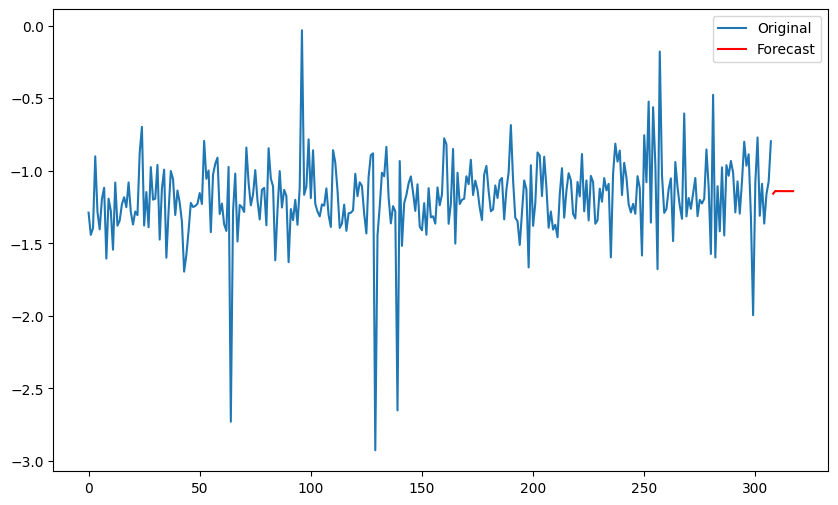

In [14]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt

def train_and_forecast_arima(train_file, column_index=2, order=(1,1,1)):
    # Load the dataset
    data = pd.read_csv(train_file, sep='\t', header=None)
    
    # Select the column for forecasting
    # Adjust column_index as per your dataset's specific time series column
    series = data.iloc[:, column_index]
    
    # Fit ARIMA model
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    
    # Summary of the model
    print(model_fit.summary())
    
    # Forecast the next steps
    forecast_steps = 10
    forecast = model_fit.forecast(steps=forecast_steps)
    
    # Plotting the forecast
    plt.figure(figsize=(10, 6))
    plt.plot(series, label='Original')
    plt.plot(range(len(series), len(series) + forecast_steps), forecast, label='Forecast', color='red')
    plt.legend()
    plt.show()
    
    return forecast

# Example usage
# Update this path to your dataset and choose the appropriate column index for forecasting
train_file_path = '/Users/shashwatkushwaha/Downloads/UCRArchive_2018/Haptics/Haptics_TEST.tsv'
forecasted_values = train_and_forecast_arima(train_file_path, column_index=1)  # Adjust column_index as needed


implementation of ARIMA model on another univariate time series

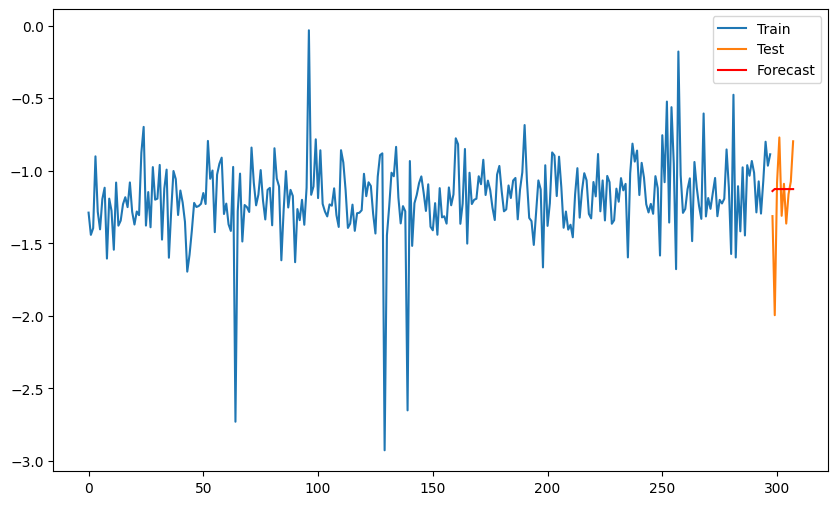

Error Rate (MAE): 0.23190167640358278


In [15]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

def train_arima_and_calculate_error(train_file, column_index=1, order=(1,1,1), test_size=10):
    # Load the dataset
    data = pd.read_csv(train_file, sep='\t', header=None)
    
    # Select the column for forecasting
    series = data.iloc[:, column_index]
    
    # Split the data into training and testing sets
    train, test = series[:-test_size], series[-test_size:]
    
    # Fit ARIMA model on the training set
    model = ARIMA(train, order=order)
    model_fit = model.fit()
    
    # Forecast the next steps
    forecast = model_fit.forecast(steps=test_size)
    
    # Calculate error rate using Mean Absolute Error (MAE)
    error = mean_absolute_error(test, forecast)
    
    # Optionally, plot the forecast against the actual values
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test')
    plt.plot(test.index, forecast, label='Forecast', color='red')
    plt.legend()
    plt.show()
    
    return error

# Example usage
train_file_path = '/Users/shashwatkushwaha/Downloads/UCRArchive_2018/Haptics/Haptics_TEST.tsv'
error_rate = train_arima_and_calculate_error(train_file_path, column_index=1, order=(1,1,1), test_size=10)  # Adjust as needed
print(f"Error Rate (MAE): {error_rate}")


implementation of ARIMA model on another univariate time series

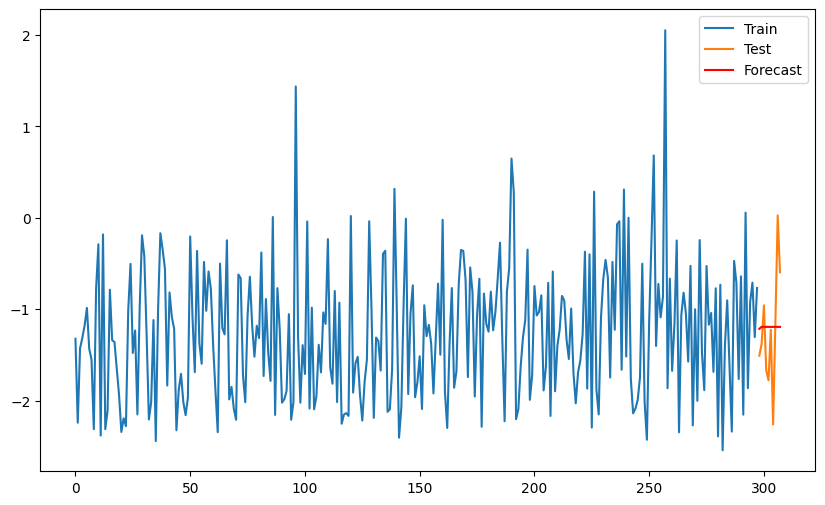

Error Rate (MAE): 0.47501116665807863


In [16]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

def train_arima_and_calculate_error(train_file, column_index=1, order=(1,1,1), test_size=10):
    # Load the dataset
    data = pd.read_csv(train_file, sep='\t', header=None)
    
    # Select the column for forecasting
    series = data.iloc[:, column_index]
    
    # Split the data into training and testing sets
    train, test = series[:-test_size], series[-test_size:]
    
    # Fit ARIMA model on the training set
    model = ARIMA(train, order=order)
    model_fit = model.fit()
    
    # Forecast the next steps
    forecast = model_fit.forecast(steps=test_size)
    
    # Calculate error rate using Mean Absolute Error (MAE)
    error = mean_absolute_error(test, forecast)
    
    # Optionally, plot the forecast against the actual values
    plt.figure(figsize=(10, 6))
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test')
    plt.plot(test.index, forecast, label='Forecast', color='red')
    plt.legend()
    plt.show()
    
    return error

# Example usage
train_file_path = '/Users/shashwatkushwaha/Downloads/UCRArchive_2018/Haptics/Haptics_TEST.tsv'
error_rate = train_arima_and_calculate_error(train_file_path, column_index=4, order=(1,1,1), test_size=10)  # Adjust as needed
print(f"Error Rate (MAE): {error_rate}")


Implementation of ARIMA on the individual columns of the dataset

In [17]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

def train_arima_for_all_columns(train_file, order=(1,1,1), test_size=10):
    # Load the dataset
    data = pd.read_csv(train_file, sep='\t', header=None)
    
    # Dictionary to hold column indices and their corresponding error rates
    error_rates = {}
    
    # Iterate through each column except the first one (assuming it's a label or index)
    for column_index in range(1, data.shape[1]):
        # Select the column for forecasting
        series = data.iloc[:, column_index]
        
        # Split the data into training and testing sets
        train, test = series[:-test_size], series[-test_size:]
        
        # Fit ARIMA model on the training set
        model = ARIMA(train, order=order)
        model_fit = model.fit()
        
        # Forecast the next steps
        forecast = model_fit.forecast(steps=test_size)
        
        # Calculate error rate using Mean Absolute Error (MAE)
        error = mean_absolute_error(test, forecast)
        
        # Record the error rate for the current column
        error_rates[column_index] = error
    
    # Convert the error rates dictionary to a DataFrame
    error_rates_df = pd.DataFrame(list(error_rates.items()), columns=['Column', 'Error Rate (MAE)'])
    
    return error_rates_df

# Example usage
train_file_path = '/Users/shashwatkushwaha/Downloads/UCRArchive_2018/Haptics/Haptics_TEST.tsv'
error_rates_df = train_arima_for_all_columns(train_file_path, order=(1,1,1), test_size=10)
print(error_rates_df.to_string())


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


      Column  Error Rate (MAE)
0          1          0.231902
1          2          0.302323
2          3          0.531317
3          4          0.475011
4          5          0.353829
5          6          0.378829
6          7          0.325510
7          8          0.403574
8          9          0.340599
9         10          0.261534
10        11          0.297099
11        12          0.305000
12        13          0.255476
13        14          0.219321
14        15          0.251028
15        16          0.275280
16        17          0.256521
17        18          0.220863
18        19          0.223857
19        20          0.236270
20        21          0.232517
21        22          0.229629
22        23          0.222147
23        24          0.211315
24        25          0.222623
25        26          0.221639
26        27          0.211462
27        28          0.207232
28        29          0.209821
29        30          0.205732
30        31          0.202976
31      

In [18]:
print(error_rates_df.to_string())

      Column  Error Rate (MAE)
0          1          0.231902
1          2          0.302323
2          3          0.531317
3          4          0.475011
4          5          0.353829
5          6          0.378829
6          7          0.325510
7          8          0.403574
8          9          0.340599
9         10          0.261534
10        11          0.297099
11        12          0.305000
12        13          0.255476
13        14          0.219321
14        15          0.251028
15        16          0.275280
16        17          0.256521
17        18          0.220863
18        19          0.223857
19        20          0.236270
20        21          0.232517
21        22          0.229629
22        23          0.222147
23        24          0.211315
24        25          0.222623
25        26          0.221639
26        27          0.211462
27        28          0.207232
28        29          0.209821
29        30          0.205732
30        31          0.202976
31      

Implementation of VectorAutoRegressive on the multivariate time series

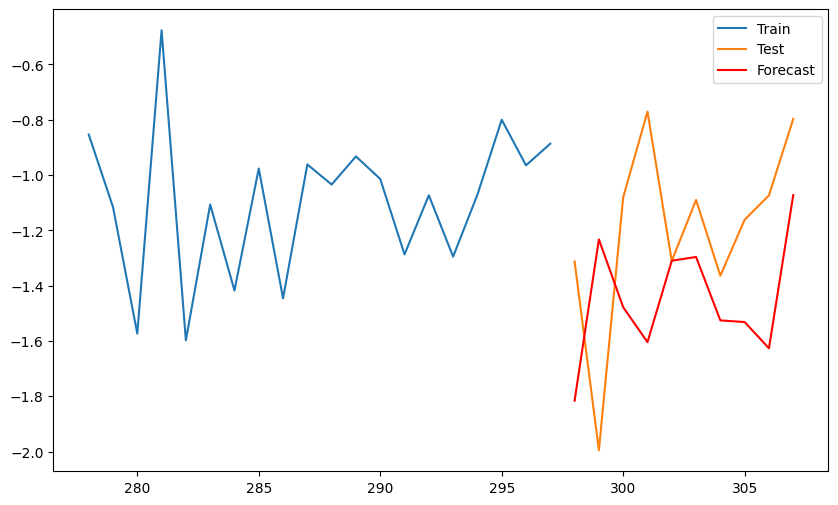

      Column  Error Rate (MAE)
0          1          0.406401
1          2          0.808437
2          3          1.384826
3          4          0.543506
4          5          0.946884
5          6          0.681501
6          7          0.246668
7          8          0.534842
8          9          0.358312
9         10          0.452039
10        11          0.446715
11        12          0.361063
12        13          0.344307
13        14          0.234564
14        15          0.217893
15        16          0.232332
16        17          0.223807
17        18          0.186349
18        19          0.154070
19        20          0.153841
20        21          0.177463
21        22          0.192085
22        23          0.174488
23        24          0.150208
24        25          0.128734
25        26          0.116409
26        27          0.114757
27        28          0.117837
28        29          0.119953
29        30          0.112510
30        31          0.111550
31      

In [19]:
import pandas as pd
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import rmse
import matplotlib.pyplot as plt

def train_var_and_calculate_errors(train_file, test_size=10):
    # Load the dataset
    data = pd.read_csv(train_file, sep='\t', header=None)
    
    # Assuming the first column might not be a feature if it's an index or label
    data = data.iloc[:, 1:]
    
    # Split the data into training and testing sets
    train, test = data[:-test_size], data[-test_size:]
    
    # Fit VAR model on the training set
    model = VAR(train)
    model_fit = model.fit()
    
    # Forecast the next steps
    forecast = model_fit.forecast(train.values[-model_fit.k_ar:], steps=test_size)
    
    # Calculate error rates using Mean Absolute Error (MAE) for each column
    error_rates = [mean_absolute_error(test.iloc[:, i], forecast[:, i]) for i in range(test.shape[1])]
    
    # Optionally, plot the forecast against the actual values for the first column as an example
    plt.figure(figsize=(10, 6))
    plt.plot(train.index[-20:], train.iloc[-20:, 0], label='Train')
    plt.plot(test.index, test.iloc[:, 0], label='Test')
    plt.plot(test.index, forecast[:, 0], label='Forecast', color='red')
    plt.legend()
    plt.show()
    
    # Compile the error rates into a DataFrame
    error_rates_df = pd.DataFrame({'Column': range(1, len(error_rates) + 1), 'Error Rate (MAE)': error_rates})
    
    return error_rates_df

train_file_path = '/Users/shashwatkushwaha/Downloads/UCRArchive_2018/Haptics/Haptics_TEST.tsv'
error_rates_df = train_var_and_calculate_errors(train_file_path, test_size=10)
print(error_rates_df.to_string())


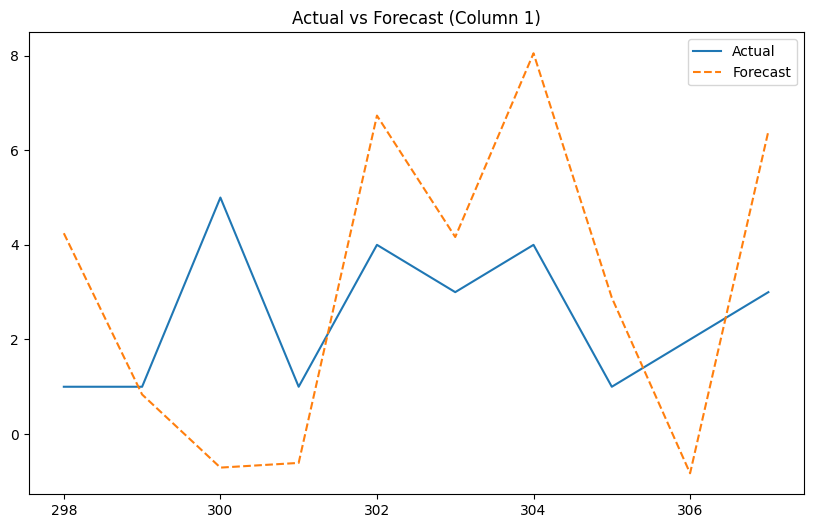

      Column       MAE
0          1  2.679151
1          2  0.474701
2          3  0.676196
3          4  1.637159
4          5  1.186977
...      ...       ...
1088    1089  1.401652
1089    1090  1.053845
1090    1091  2.483972
1091    1092  4.618753
1092    1093  3.837540

[1093 rows x 2 columns]


In [20]:
import pandas as pd
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

def load_and_prepare_data(file_path):
    # Load the dataset without assuming any datetime parsing
    data = pd.read_csv(file_path, sep='\t', header=None)
    
    # Optionally, drop or select columns as needed. For example:
    # data = data.drop(columns=[0])  # If the first column is not needed
    
    return data

def fit_var_model(data, lags=5, test_size=10):
    # Assuming all columns are numeric and part of the time series analysis
    
    # Split the data into training and testing sets
    n = len(data)
    train = data.iloc[:n-test_size, :]
    test = data.iloc[n-test_size:, :]
    
    # Fit the VAR model
    model = VAR(train)
    fitted_model = model.fit(maxlags=lags)

    # Forecast
    forecast = fitted_model.forecast(train.values[-fitted_model.k_ar:], steps=test_size)

    # Evaluate and plot
    errors = []
    for i in range(test.shape[1]):
        actual = test.iloc[:, i]
        pred = forecast[:, i]
        error = mean_absolute_error(actual, pred)
        errors.append(error)
        
        # Plotting the actual vs forecast for the first column as an example
        if i == 0:
            plt.figure(figsize=(10, 6))
            plt.plot(actual.index, actual, label='Actual')
            plt.plot(actual.index, pred, label='Forecast', linestyle='--')
            plt.title(f'Actual vs Forecast (Column {i+1})')
            plt.legend()
            plt.show()

    # Compile errors into a DataFrame
    error_df = pd.DataFrame({'Column': range(1, len(errors) + 1), 'MAE': errors})
    return error_df

# Update with your file path
file_path = '/Users/shashwatkushwaha/Downloads/UCRArchive_2018/Haptics/Haptics_TEST.tsv'
data = load_and_prepare_data(file_path)
error_df = fit_var_model(data, lags=5, test_size=10)
print(error_df)


Implementation of Shapelet Model on the MTS dataset

In [21]:
!pip install tslearn
from tslearn.shapelets import ShapeletModel
from tslearn.shapelets import grabocka_params_to_shapelet_size_dict
from tslearn.utils import to_time_series_dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Example data loading and preparation
data = pd.read_csv('/Users/shashwatkushwaha/Downloads/UCRArchive_2018/Haptics/Haptics_TEST.tsv')
X = data.iloc[:, 1:].values  # Feature columns
y = data.iloc[:, 0].values   # Labels

# Encode labels if they are not numeric
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Reshape data for tslearn
X_ts = to_time_series_dataset(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_ts, y_encoded, test_size=0.2, random_state=42)

# Define shapelet sizes
shapelet_sizes = grabocka_params_to_shapelet_size_dict(n_ts=X_train.shape[0], ts_sz=X_train.shape[1], n_classes=len(np.unique(y_train)), l=0.1, r=1)

# Initialize and fit the Shapelet Model
shp_clf = ShapeletModel(n_shapelets_per_size=shapelet_sizes,
                        optimizer="sgd", weight_regularizer=0.01,
                        verbose=1)
shp_clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = shp_clf.predict(X_test)
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate error rate
error_rate = 1 - accuracy

print(f"Accuracy: {accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 1.6 MB/s eta 0:00:00a 0:00:01


ModuleNotFoundError: No module named 'tslearn'

In [ ]:
!pip install git+https://github.com/tslearn-team/tslearn.git


Implementation of Time Series Bag of Features

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis
from scipy.fft import fft

def extract_features(series):
    # Time domain features
    mean_val = np.mean(series)
    var_val = np.var(series)
    skew_val = skew(series)
    kurt_val = kurtosis(series)
    
    # Frequency domain features (example)
    fft_vals = np.abs(fft(series))
    fft_mean = np.mean(fft_vals)
    fft_var = np.var(fft_vals)
    
    # Combine features into a single list
    features = [mean_val, var_val, skew_val, kurt_val, fft_mean, fft_var]
    
    return features

def transform_dataset(data):
    features = []
    
    for i in range(len(data)):
        series_features = extract_features(data.iloc[i, 1:])  # Exclude label column
        features.append(series_features)
    
    return np.array(features)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def classify_with_tsb_features(features, labels):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
    
    classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    classifier.fit(X_train, y_train)
    
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Classification Accuracy: {accuracy * 100:.2f}%")
    
    return classifier
# Load your dataset
data = pd.read_csv('/Users/shashwatkushwaha/Downloads/UCRArchive_2018/Haptics/Haptics_TEST.tsv', sep='\t', header=None)

# Transform the dataset
features = transform_dataset(data)

# Labels
labels = data.iloc[:, 0].values  # Assuming the first column is the class label

# Classify
model = classify_with_tsb_features(features, labels)


Implementation of Collection of Transformation Ensembles

In [ ]:
!pip install sktime 

In [ ]:
%pip install sktime
import sktime

In [ ]:
def from_nested_to_2d_array(X, return_numpy=False):
    """Convert nested Panel to 2D numpy Panel.

    Convert nested pandas DataFrame or Series with NumPy arrays or
    pandas Series in cells into tabular
    pandas DataFrame with primitives in cells, i.e. a data frame with the
    same number of rows as the input data and
    as many columns as there are observations in the nested series. Requires
    series to be have the same index.

    Parameters
    ----------
    X : nested pd.DataFrame or nested pd.Series
    return_numpy : bool, default = False
        - If True, returns a NumPy array of the tabular data.
        - If False, returns a pandas DataFrame with row and column names.

    Returns
    -------
     Xt : pandas DataFrame
        Transformed DataFrame in tabular format
    """
    # TODO does not handle dataframes with nested series columns *and*
    #  standard columns containing only primitives

    # convert nested data into tabular data
    if isinstance(X, pd.Series):
        Xt = np.array(X.tolist())

    elif isinstance(X, pd.DataFrame):
        try:
            Xt = np.hstack([X.iloc[:, i].tolist() for i in range(X.shape[1])])

        # except strange key error for specific case
        except KeyError:
            if (X.shape == (1, 1)) and (X.iloc[0, 0].shape == (1,)):
                # in fact only breaks when an additional condition is met,
                # namely that the index of the time series of a single value
                # does not start with 0, e.g. pd.RangeIndex(9, 10) as is the
                # case in forecasting
                Xt = X.iloc[0, 0].values
            else:
                raise

        if Xt.ndim != 2:
            raise ValueError(
                "Tabularization failed, it's possible that not "
                "all series were of equal length"
            )

    else:
        raise ValueError(
            f"Expected input is pandas Series or pandas DataFrame, "
            f"but found: {type(X)}"
        )

    if return_numpy:
        return Xt

    Xt = pd.DataFrame(Xt)

    # create column names from time index
    if X.ndim == 1:
        time_index = (
            X.iloc[0].index
            if hasattr(X.iloc[0], "index")
            else np.arange(X.iloc[0].shape[0])
        )
        columns = [f"{X.name}__{i}" for i in time_index]

    else:
        columns = []
        for colname, col in X.items():
            time_index = (
                col.iloc[0].index
                if hasattr(col.iloc[0], "index")
                else np.arange(col.iloc[0].shape[0])
            )
            columns.extend([f"{colname}__{i}" for i in time_index])

    Xt.index = X.index
    Xt.columns = columns
    return Xt



In [ ]:
!pip install numba
!pip3 install sktime[all_extras]

zsh:1: no matches found: sktime[all_extras]


In [ ]:
import os
import warnings
import pandas as pd
from sklearn.metrics import accuracy_score
from sktime.classification.hybrid import HIVECOTEV1
from sktime.datatypes._panel._convert import from_2d_array_to_nested

warnings.filterwarnings('ignore')

def process_and_evaluate_cote(train_file_path, test_file_path):
    # Load TSV files directly
    def load_tsv(file_path):
        data = pd.read_csv(file_path, sep='\t', header=None)
        # Assuming first column is label
        X = data.drop(columns=[0])
        y = data[0]
        # Convert from pandas DataFrame to nested sktime format
        X_nested = from_2d_array_to_nested(X)
        return X_nested, y

    # Load and preprocess training and testing data
    X_train, y_train = load_tsv(train_file_path)
    X_test, y_test = load_tsv(test_file_path)

    # Initialize and train the HIVECOTEV1 classifier
    model = HIVECOTEV1()
    model.fit(X_train, y_train)

    # Predict and calculate error rate
    y_pred = model.predict(X_test)
    error_rate = 1 - accuracy_score(y_test, y_pred)

    return train_file_path, test_file_path, error_rate

results = []

master_folder_path = '/Users/shashwatkushwaha/Downloads/UCRArchive_2018'  # Update this path

for folder_name in os.listdir(master_folder_path):
    folder_path = os.path.join(master_folder_path, folder_name)
    if os.path.isdir(folder_path):
        train_file_path = os.path.join(folder_path, folder_name + '_TRAIN.tsv')
        test_file_path = os.path.join(folder_path, folder_name + '_TEST.tsv')
        if os.path.isfile(train_file_path) and os.path.isfile(test_file_path):
            try:
                result = process_and_evaluate_cote(train_file_path, test_file_path)
                results.append(result)
            except Exception as e:
                print(f"Error processing {train_file_path} and {test_file_path}: {e}")

results_df_cote_error_rate_train = pd.DataFrame(results, columns=['Train File', 'Test File', 'Error Rate'])

print(results_df_cote_error_rate_train.to_string())


Error processing /Users/shashwatkushwaha/Downloads/UCRArchive_2018/Haptics/Haptics_TRAIN.tsv and /Users/shashwatkushwaha/Downloads/UCRArchive_2018/Haptics/Haptics_TEST.tsv: HIVECOTEV1 requires package 'numba' to be present in the python environment, but 'numba' was not found. 'numba' is a soft dependency and not included in the base sktime installation. Please run: `pip install numba` to install the numba package. To install all soft dependencies, run: `pip install sktime[all_extras]`
Error processing /Users/shashwatkushwaha/Downloads/UCRArchive_2018/SyntheticControl/SyntheticControl_TRAIN.tsv and /Users/shashwatkushwaha/Downloads/UCRArchive_2018/SyntheticControl/SyntheticControl_TEST.tsv: HIVECOTEV1 requires package 'numba' to be present in the python environment, but 'numba' was not found. 'numba' is a soft dependency and not included in the base sktime installation. Please run: `pip install numba` to install the numba package. To install all soft dependencies, run: `pip install skti